In [2]:
from array import array
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
def fderiv(par,y,t,deriv):
    
    alpha = par[0]
    K = par[1]
    
    deriv[0] = alpha*np.log(K/y)*y
    #print (y[0],deriv[0])

In [4]:
def rk4(y,nY,t,tau,par,deriv):
    F1 = array('d')
    F2 = array('d')
    F3 = array('d')
    F4 = array('d')
    ytemp = array('d')
    
    for i in range(0,nY):
        F1.append(0.0)
        F2.append(0.0)
        F3.append(0.0)
        F4.append(0.0)
        ytemp.append(0.0)
        
    fderiv(par,y,t,F1)
    
    half_tau = 0.5*tau
    t_half = t + half_tau
    
    for i in range(0,nY):
        ytemp[i] = y[i] + half_tau*F1[i]
        
    fderiv(par,ytemp,t_half,F2)
    
    for i in range(0,nY):
        ytemp[i] = y[i] + half_tau*F2[i]
        
    fderiv(par,ytemp,t_half,F3)
    
    t_full = t + tau

    for i in range(0,nY):
        ytemp[i] = y[i] + tau*F3[i]
        
    fderiv(par,ytemp,t_full,F4)
    
    for i in range(0,nY):
        y[i] = y[i] + tau/6.0*(F1[i]+F4[i]+2.0*(F2[i]+F3[i]))

Value of x at t = 57.760 is 11000.072
Time Values at interval endpoints
199.9999999998967
0.0
50001
Function Values at interval endpoints
11997.97286131026
4000.0
50001


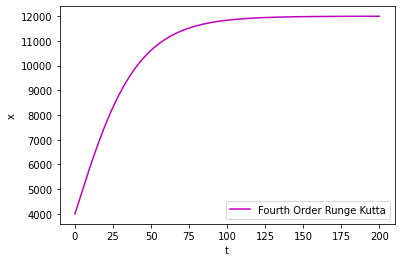

In [6]:
nStep = 50000
a = 200

par = np.array([0.0439,12000.0])
    
tau = a/nStep

# Everything below this point is calculated.
y0 = 4000.0
yp0 = 192.9163

tlow = 0

y4 = array('d')
state4 = array('d')
deriv4 = array('d')

nState = 1
y4.append(y0)
state4.append(y4[0])

for i in range(0,nState):
    deriv4.append(yp0)
    
yplot4 = array('d')
tplot4 = array('d')

debug = True

time = 0.0
flag = True
for iStep in range(0,nStep+1):
    yplot4.append(y4[0])
    tplot4.append(time)
    rk4(state4,nState,time,tau,par,deriv4)
    y4[0]=state4[0]
    time = time + tau
    if y4[0]>=11000.0 and flag:
        print ('Value of x at t = %0.3f is %0.3f' % (time-tau,y4[0]))
        flag = False

if debug:
    print ('Time Values at interval endpoints')
    print (tplot4[nStep])
    print (tplot4[0])
    print (len(tplot4))

    print ('Function Values at interval endpoints')
    print (yplot4[nStep])
    print (yplot4[0])
    print (len(yplot4))
    
plt.plot(tplot4[0:nStep+1],yplot4[0:nStep+1],'m-',label='Fourth Order Runge Kutta')
plt.ylabel('x')
plt.xlabel('t')
#plt.xscale('log')
plt.legend()
    
